# Data Science for Good -Exploring data for PASSNYC

Kaggle has come up with its second dataset in the data science for good series if I can call it so !!!.Here we have been presented with data from PASSNYC ,an not for profit organisation that is focussed on expanding the educational opportunities for NYC's talented and underserved students. We are asked to provide some insights in terms of quantifying the problems that the students are likely to face while taking up the **SHSAT (Specialized High School Admission Test)** so that PASSNYC can focus on their needs and can work in improving the enrollment rates in high schools from underserved students and thereby increasing the diversity in the schools.Some of the past indicators used by the org include English Language Learners, Students with Disabilities, Students on Free/Reduced Lunch, and Students with Temporary Housing .

What PASSNYC is doing is an amazing work and it providing education to this category of students can provide empowerment and turn their life into something different.A personal thank you from me and keep contributing to the society ...

Now lets dive into the analysis.

#### Reading the data and importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

school = pd.read_csv('2016 School Explorer.csv')
test = pd.read_csv('D5 SHSAT Registrations and Testers.csv')


#### Shape of the dataset:

In [2]:
print('Number of rows in school explorer:',school.shape[0],'Number of columns in school explorer',school.shape[1],end='\n')
print('Number of rows SHSAT Data:',test.shape[0],'Number of columns in SHSAT Data',test.shape[1],end='\n')

Number of rows in school explorer: 1272 Number of columns in school explorer 161
Number of rows SHSAT Data: 140 Number of columns in SHSAT Data 7


#### Print few rows:

In [3]:
school.head(3)

,Adjusted Grade,New?,Other Location Code in LCGMS,School Name,SED Code,Location Code,District,Latitude,Longitude,Address (Full),...,Grade 8 Math - All Students Tested,Grade 8 Math 4s - All Students,Grade 8 Math 4s - American Indian or Alaska Native,Grade 8 Math 4s - Black or African American,Grade 8 Math 4s - Hispanic or Latino,Grade 8 Math 4s - Asian or Pacific Islander,Grade 8 Math 4s - White,Grade 8 Math 4s - Multiracial,Grade 8 Math 4s - Limited English Proficient,Grade 8 Math 4s - Economically Disadvantaged
0,NaN,NaN,NaN,P.S. 015 ROBERTO CLEMENTE,310100010015,01M015,1,40.721834,-73.978766,"333 E 4TH ST NEW YORK, NY 10009",...,0,0,0,0,0,0,0,0,0,0
1,NaN,NaN,NaN,P.S. 019 ASHER LEVY,310100010019,01M019,1,40.729892,-73.984231,"185 1ST AVE NEW YORK, NY 10003",...,0,0,0,0,0,0,0,0,0,0
2,NaN,NaN,NaN,P.S. 020 ANNA SILVER,310100010020,01M020,1,40.721274,-73.986315,"166 ESSEX ST NEW YORK, NY 10002",...,0,0,0,0,0,0,0,0,0,0


In [4]:
test.head(4)

,DBN,School name,Year of SHST,Grade level,Enrollment on 10/31,Number of students who registered for the SHSAT,Number of students who took the SHSAT
0,05M046,P.S. 046 Arthur Tappan,2013,8,91,31,14
1,05M046,P.S. 046 Arthur Tappan,2014,8,95,26,7
2,05M046,P.S. 046 Arthur Tappan,2015,8,73,21,10
3,05M046,P.S. 046 Arthur Tappan,2016,8,56,20,8


#### Number of schools considered :

At first look let us know the unique schools for which data is available.

In [8]:
school['School Name'].nunique()

1270

And the number of schools are spread across how many cities ?

In [16]:
school.groupby('City')['School Name'].nunique().sort_values(ascending=False)

City
BROOKLYN               411
BRONX                  297
NEW YORK               232
STATEN ISLAND           60
JAMAICA                 32
FLUSHING                30
LONG ISLAND CITY        21
FAR ROCKAWAY            13
BAYSIDE                 13
SPRINGFIELD GARDENS     11
SOUTH OZONE PARK        10
CORONA                   9
ELMHURST                 8
JACKSON HEIGHTS          8
WOODSIDE                 7
RICHMOND HILL            7
RIDGEWOOD                7
QUEENS VILLAGE           6
REGO PARK                6
ASTORIA                  6
FOREST HILLS             6
OZONE PARK               6
GLENDALE                 5
WHITESTONE               5
SAINT ALBANS             5
ROCKAWAY PARK            5
ROSEDALE                 4
HOLLIS                   4
BELLEROSE                4
MIDDLE VILLAGE           4
HOWARD BEACH             3
FLORAL PARK              3
WOODHAVEN                3
LITTLE NECK              3
EAST ELMHURST            3
MASPETH                  3
CAMBRIA HEIGHTS        

City of Brooklin has maximum representation of schools followed by Bronx,New York Cities.

### What grades do the schools teach - Grade Distribution :

Inorder to better help us with providing final insights,let us see the grades which the representative schools teach for.PK represents Pre Kindergarden,OK is Kindergarden followed by 1st grade till 12th grade.

In [3]:
grade=school['Grades'].str.split(',').apply(pd.Series ,1).stack()
grade.index=grade.index.droplevel(-1)
grade=grade.to_frame()
grade.columns=['Grade']
grade.head()

,Grade
0,PK
0,0K
0,01
0,02
0,03


Text(0,0.5,'Count')

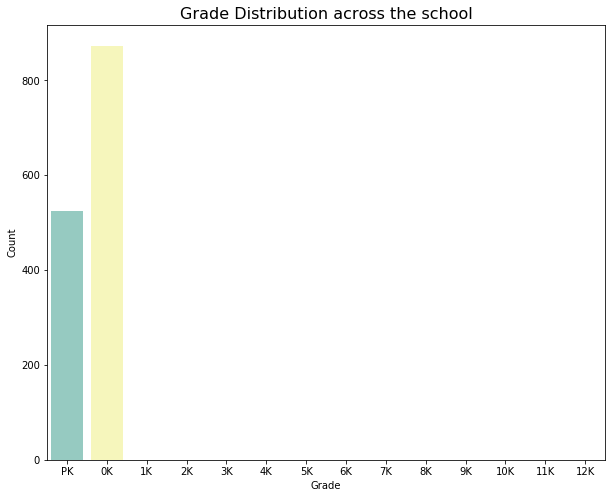

In [48]:
plt.figure(figsize=(10,8))
g=sns.countplot(x=grade['Grade'],data=grade,order=['PK','0K','1K','2K','3K','4K','5K','6K','7K','8K','9K','10K','11K','12K'],palette=sns.color_palette('Set3'))
g.set_title('Grade Distribution across the school',fontsize=16)
g.set_xlabel('Grade',fontsize=10)
g.set_ylabel('Count',fontsize=10)


We see from the graph that most of the schools are teaching PK and OK.

#### Economic Need Index:

According to the educator guide from the New York city progress report,economic need index reflects the socioeconomic status of the school population.Let us see how this index is distributed.

c:\users\deepak kumar\appdata\local\programs\python\python35\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Distribution of the Economic Need Index across the schools')

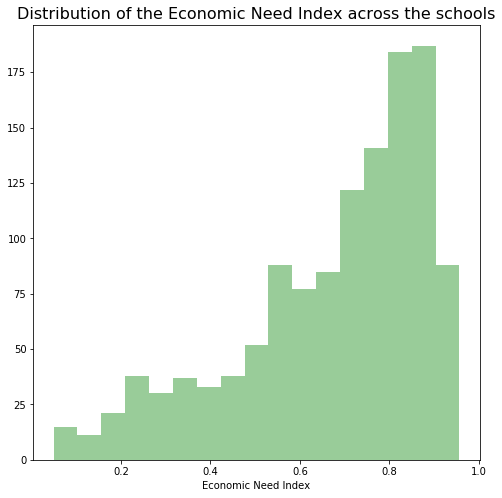

In [30]:
plt.figure(figsize=(8,8))
sns.distplot(school['Economic Need Index'].dropna(),kde=False,color='green').set_title('Distribution of the Economic Need Index across the schools',fontsize=16)

We see that the economic need index is on the higher side.

#### Community School Vs Economic Need Index

According to the definition from [New York government website](https://www1.nyc.gov/site/communityschools/index.page) community schools are neighborhood hubs where students receive high-quality academic instruction, families can access social services, and communities congregate to share resources and address their common challenges.One can find in community schools the following,

We will visualise the economic need index with the school status (community school or not)

In [39]:
school['Community School?'].value_counts()

No     1196
Yes      76
Name: Community School?, dtype: int64

Text(0.5,1,'Economic Need Index and Community School')

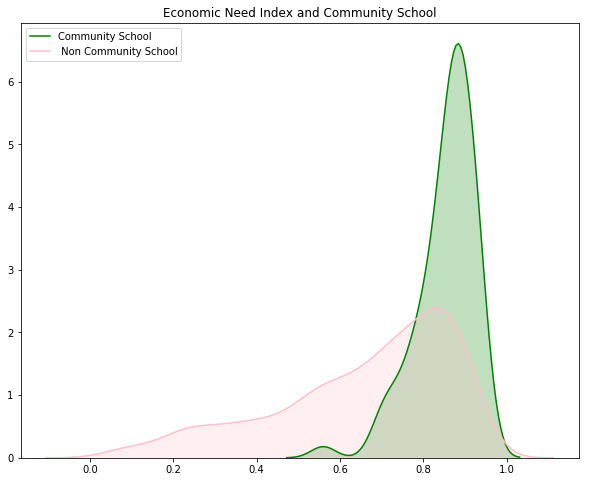

In [38]:
plt.figure(figsize=(10,8))
ax=sns.kdeplot(school.loc[(school['Community School?']=='Yes'),'Economic Need Index'].dropna(),color="green",shade=True,label="Community School")
ax=sns.kdeplot(school.loc[(school['Community School?']=='No'),'Economic Need Index'].dropna(),color="pink",shade=True,label=" Non Community School")
ax.set_title("Economic Need Index and Community School")

We find that the economic need index for the community schools are higher whereas for a non community school,the need index is lower.This means that the percentage of temporary housing,percentage of HRA eligible,percentage of free lunch eligible values are higher.The need index is calculated from the following formula according to one of the NYC department of Education's [educator guide report](http://schools.nyc.gov/NR/rdonlyres/BF3F9933-10BA-4847-9A02-62D1D8D2F513/0/EducatorGuide_EMS_10_30_2014.pdf), 

Economic Need Index = (Percent Temporary Housing) + (Percent HRA Eligible × 0.5)+ (Percent Free Lunch Eligible × 0.5)

#### School Income Estimate :

Let us understand the income estime with various factors - city,community schools .

In [4]:
school['School Income Estimate']=school['School Income Estimate'].str.replace(",","")
school['School Income Estimate']=school['School Income Estimate'].str.replace("$","")
school['School Income Estimate']=school['School Income Estimate'].astype(float)

Text(0.5,1,'School Income Estimate and Community School')

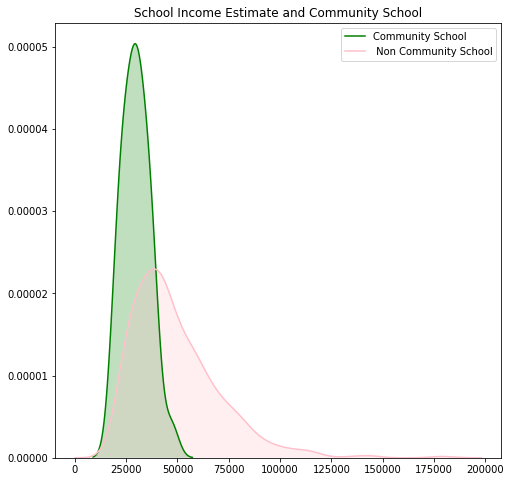

In [13]:
plt.figure(figsize=(8,8))
ax=sns.kdeplot(school.loc[(school['Community School?']=='Yes'),'School Income Estimate'].dropna(),color="green",shade=True,label="Community School")
ax=sns.kdeplot(school.loc[(school['Community School?']=='No'),'School Income Estimate'].dropna(),color="pink",shade=True,label=" Non Community School")
ax.set_title("School Income Estimate and Community School")

We find that the income estimate for community school is higher compared to a non community school but the non-community school is skewed towards right.Let us see the distribution with respect to the city.

Text(0,0.5,'City')

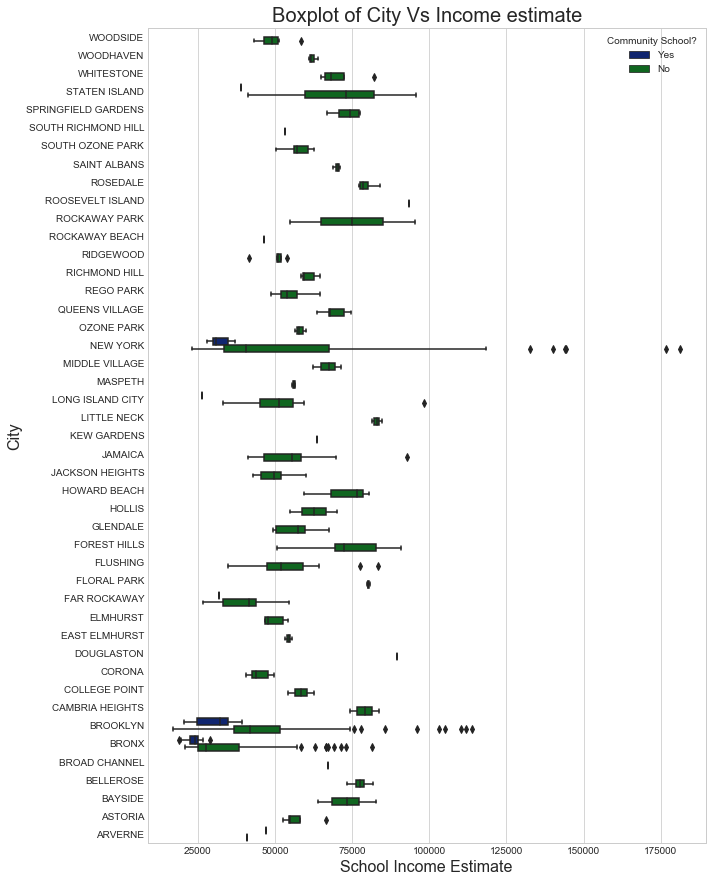

In [14]:
plt.figure(figsize=(10,15))
sns.set_style("whitegrid")
my_order = school.groupby(by=["City"])["School Income Estimate"].max().iloc[::-1].index
g=sns.boxplot(x=school['School Income Estimate'],y=school['City'],data=school,hue=school['Community School?'],palette=sns.color_palette(palette="dark"),order=my_order)
g.set_title("Boxplot of City Vs Income estimate",fontsize=20)
g.set_xlabel("School Income Estimate",fontsize=16)
g.set_ylabel("City",fontsize=16)

At first site we find that city of Newyork has maximum income estimate school and also has lot of outliers.Community schools are also concentrated in Newyork.

#### Income Estimate Vs Economic Need Index :

Let us find the relationship between income estimate and economic need index between a community and non community school

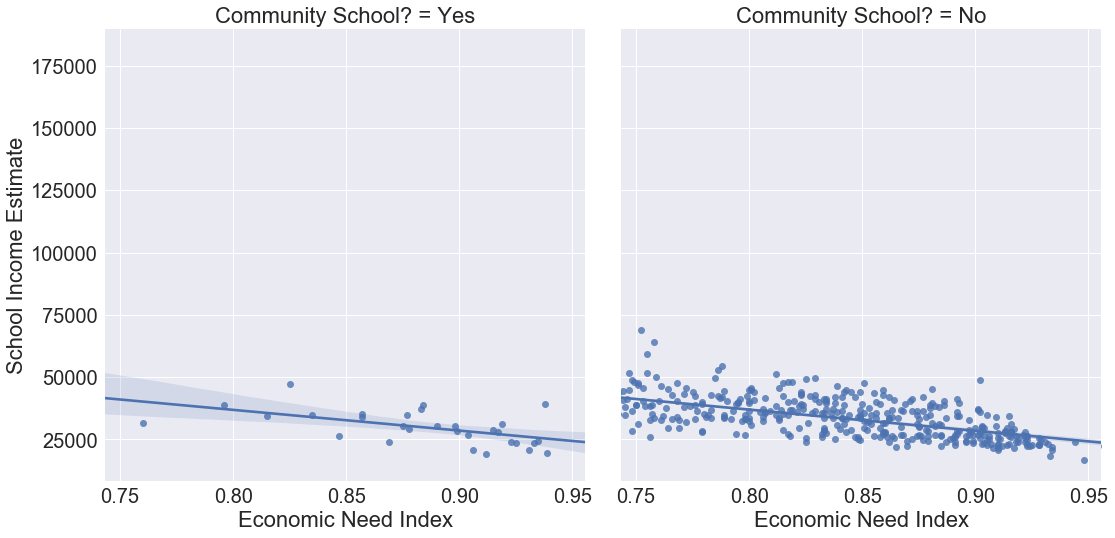

In [5]:
sns.set(font_scale=2)
g=sns.FacetGrid(school,col="Community School?",size=8)
g.map(sns.regplot,"Economic Need Index","School Income Estimate",fit_reg=True)

We find that irrespective of the community school status , as the need index increases the income estimate decreases.

#### Merge with the SHSAT File:

In [2]:
test['School name']=test['School name'].str.upper()
school_test = pd.merge(school,test,how="left",left_on=['School Name'],right_on=['School name'])
school_test.shape

(1361, 168)

### Total Enrollment Trend and actual test takers:

In [25]:
trend=test.groupby(['Year of SHST'])['Enrollment on 10/31','Number of students who registered for the SHSAT','Number of students who took the SHSAT'].sum().reset_index()
trend['Year of SHST']=pd.to_datetime(trend['Year of SHST'],format="%Y")
trend['Year of SHST']=trend['Year of SHST'].dt.year
trend.head()

,Year of SHST,Enrollment on 10/31,Number of students who registered for the SHSAT,Number of students who took the SHSAT
0,2013,3109,660,314
1,2014,3243,838,347
2,2015,3164,597,341
3,2016,3360,575,351


In [26]:
trace1 = go.Bar(
    x=trend['Year of SHST'],
    y=trend['Number of students who registered for the SHSAT'],
    orientation = 'v',
    name = "Number of students who registered"
)
trace2 = go.Bar(
    x=trend['Year of SHST'],
    y=trend['Number of students who took the SHSAT'],
    orientation = 'v',
    name = "Number of students who took the test")
layout = go.Layout(
    title='SHSAT:Students who enrolled Vs Students who wrote',
    barmode='group'
    #width = 1000,
    #height = 4500
    #yaxis=dict(tickangle=-45),
)

data = [trace1, trace2]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="WorkToolsFrequency")

We find that over the years the number of students who took the test has remained at the same level and is far below than those who registered.